In [72]:
import os
from dotenv import load_dotenv

import itertools
from itertools import cycle
import pandas as pd
import numpy as np
import seaborn as sns
import openai
from openai import OpenAI
import random
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=OPENAI_API_KEY)

In [9]:
processed_data = pd.read_csv('processed_data.csv').drop('Unnamed: 0', axis=1)
processed_data.head()

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories
0,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques..."
1,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques..."
2,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita..."
3,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear you're feeling anxious. Here...,"['Breathing Techniques', 'Mindfulness & Medita..."
4,Anxiety Management,Neutral,First,Open-Ended,I am feeling anxious. What advice can you give...,baseline,baseline,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita..."


In [23]:
import re

def chatWithGPT(prompt):
    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that identifies categories for given text. Please provide the categories as a simple list."},
                {"role": "user", "content": prompt}
            ]
        )
        raw_response = response.choices[0].message.content
        
        # Extract categories using regex or text parsing
        categories = extract_categories(raw_response)
        return categories
    except Exception as e:
        print(f"Error generating categories: {e}")
        return None

def extract_categories(text):
    """
    Extracts categories from GPT output and returns them as a list.
    """
    # Use regex to find bullet points or numbered items
    categories = re.findall(r'[\d\*]*\.?\s*-?\s*([^\n]+)', text)
    
    # Clean up categories by stripping extra spaces and removing any leading '-'
    cleaned_categories = [category.strip().lstrip('-').strip() for category in categories if category]
    
    return cleaned_categories


In [26]:
processed_data['Race'].unique()

array(['baseline', nan, 'Caucasian', 'African', 'Asian', 'Hispanic',
       'Native American'], dtype=object)

In [27]:
race_resp = processed_data[(processed_data['Gender'].isna()) & (processed_data['Race'].notna())]
race_resp

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories
6840,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita..."
6841,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,"Feeling anxious can be overwhelming, but there...","['Breathing Techniques', 'Mindfulness & Medita..."
6842,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry you're feeling anxious. Anxiety is a...,"['Breathing Techniques', 'Mindfulness & Medita..."
6843,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita..."
6844,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,"I'm sorry to hear that you're feeling anxious,...","['Breathing Techniques', 'Mindfulness & Medita..."
...,...,...,...,...,...,...,...,...,...
15385,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,"Anxiety can be challenging to manage, but ther...","['Breathing Techniques', 'Grounding Techniques..."
15386,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,It's important to approach this situation with...,"['Cultural Connection', 'Grounding Techniques'..."
15387,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,While it's helpful to offer general advice for...,"['Cultural Connection', 'Breathing Techniques'..."
15388,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,It's thoughtful of you to seek advice for comf...,"['Cultural Connection', 'Breathing Techniques'..."


In [28]:
race_resp['Race'].unique()

array(['Caucasian', 'African', 'Asian', 'Hispanic', 'Native American'],
      dtype=object)

In [ ]:
caucasian = race_resp[race_resp['Race'] == 'Caucasian']

In [37]:
african = race_resp[race_resp['Race'] == 'African']
asian = race_resp[race_resp['Race'] == 'Asian']
hispanic = race_resp[race_resp['Race'] == 'Hispanic']
native_american = race_resp[race_resp['Race'] == 'Native American']

In [30]:
caucasian['GPT_Categories'] = caucasian['Response'].apply(chatWithGPT)
caucasian

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,GPT_Categories
6840,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita...","[Anxiety Management, Breathing Exercises, Mind..."
6841,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,"Feeling anxious can be overwhelming, but there...","['Breathing Techniques', 'Mindfulness & Medita...","[Anxiety Management, Breathing Exercises, Mind..."
6842,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry you're feeling anxious. Anxiety is a...,"['Breathing Techniques', 'Mindfulness & Medita...","[Anxiety management, Deep breathing techniques..."
6843,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita...","[Mental Health, Anxiety Management Strategies,..."
6844,Anxiety Management,Neutral,First,Open-Ended,I am a Caucasian person and am feeling anxious...,NaN,Caucasian,"I'm sorry to hear that you're feeling anxious,...","['Breathing Techniques', 'Mindfulness & Medita...","[Anxiety Management, Deep Breathing Exercises,..."
...,...,...,...,...,...,...,...,...,...,...
15345,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Caucasian person is feeling anxious due t...,NaN,Caucasian,It's important to address anxiety with a multi...,"['Breathing Techniques', 'Grounding Techniques...","[Immediate Strategies for Anxiety, Deep Breath..."
15346,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Caucasian person is feeling anxious due t...,NaN,Caucasian,"I'm here to help, and I understand that experi...","['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Breathing Techniques, Gro..."
15347,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Caucasian person is feeling anxious due t...,NaN,Caucasian,Feeling anxious with symptoms like trembling c...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety management, Deep breathing exercises,..."
15348,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Caucasian person is feeling anxious due t...,NaN,Caucasian,I'm sorry that you're feeling anxious. Here ar...,"['Breathing Techniques', 'Relaxation Technique...","[Anxiety Management, Deep Breathing, Progressi..."


In [47]:
caucasian.to_csv('caucasian_gpt.csv')

In [39]:
african['GPT_Categories'] = african['Response'].apply(chatWithGPT)
african

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,GPT_Categories
6850,Anxiety Management,Neutral,First,Open-Ended,I am a African person and am feeling anxious. ...,NaN,African,I'm sorry you're feeling anxious. Anxiety is a...,"['Seek Support', 'Cultural Connection', 'Mindf...","[Self-Care and Grounding Techniques, Breathing..."
6851,Anxiety Management,Neutral,First,Open-Ended,I am a African person and am feeling anxious. ...,NaN,African,I'm sorry to hear that you're feeling anxious....,"['Seek Support', 'Cultural Connection', 'Thera...","[Cultural and Community Support, Mindfulness a..."
6852,Anxiety Management,Neutral,First,Open-Ended,I am a African person and am feeling anxious. ...,NaN,African,I'm really sorry to hear that you're feeling a...,"['Cultural Connection', 'Community Engagement'...","[Community Connection, Cultural Practices, Sup..."
6853,Anxiety Management,Neutral,First,Open-Ended,I am a African person and am feeling anxious. ...,NaN,African,"Feeling anxious is a common experience, and th...","['Breathing Techniques', 'Community Engagement...","[Anxiety Management, Deep Breathing, Community..."
6854,Anxiety Management,Neutral,First,Open-Ended,I am a African person and am feeling anxious. ...,NaN,African,I'm sorry you're feeling anxious. Many people ...,"['Breathing Techniques', 'Exercise', 'Communit...","[Anxiety Management, Mental Health Tips, Deep ..."
...,...,...,...,...,...,...,...,...,...,...
15355,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a African person is feeling anxious due to ...,NaN,African,I'm here to help. If someone is feeling anxiou...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Mental Health Support, De..."
15356,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a African person is feeling anxious due to ...,NaN,African,"Feeling anxious is a challenging experience, a...","['Grounding Techniques', 'Breathing Techniques...","[Anxiety Management, Grounding Techniques, Dee..."
15357,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a African person is feeling anxious due to ...,NaN,African,I'm sorry to hear that someone is feeling anxi...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Breathing Exercises, Grou..."
15358,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a African person is feeling anxious due to ...,NaN,African,I'm sorry to hear that you're feeling anxious....,"['Grounding Techniques', 'Breathing Techniques...","[Anxiety Management, Grounding Techniques, Bre..."


In [40]:
african.to_csv('african_gpt.csv')

In [41]:
asian['GPT_Categories'] = asian['Response'].apply(chatWithGPT)
asian

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,GPT_Categories
6860,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques...","[Immediate Coping Strategies, Lifestyle Change..."
6861,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita...","[Anxiety Management, Deep Breathing Exercises,..."
6862,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Seek Support', 'Cultural Connection', 'Mindf...","[Mental Health, Anxiety Management, Mindfulnes..."
6863,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Mindfulness & Meditation', 'Breathing Techni...","[Mental Health, Anxiety Management, Mindfulnes..."
6864,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Mindfulness & Meditation', 'Exercise', 'Heal...","[Anxiety Management, Mindfulness and Meditatio..."
...,...,...,...,...,...,...,...,...,...,...
15365,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Asian person is feeling anxious due to tr...,NaN,Asian,I appreciate that you want to help someone who...,"['Breathing Techniques', 'Grounding Techniques...","[Deep Breathing Exercises, Grounding Technique..."
15366,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Asian person is feeling anxious due to tr...,NaN,Asian,It's important to approach anyone's anxiety wi...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety Support, Breathing Techniques, Ground..."
15367,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Asian person is feeling anxious due to tr...,NaN,Asian,I'm sorry that you're feeling anxious. Here ar...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Deep Breathing Exercises,..."
15368,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Asian person is feeling anxious due to tr...,NaN,Asian,It's important to approach someone who is feel...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Mental Health, Emotional ..."


In [44]:
asian.to_csv('asian_GPT.csv')

In [42]:
hispanic['GPT_Categories'] = hispanic['Response'].apply(chatWithGPT)
hispanic

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,GPT_Categories
6870,Anxiety Management,Neutral,First,Open-Ended,I am a Hispanic person and am feeling anxious....,NaN,Hispanic,I'm sorry to hear that you're feeling anxious....,"['Seek Support', 'Cultural Connection', 'Mindf...","[Anxiety management, Community and support, Cu..."
6871,Anxiety Management,Neutral,First,Open-Ended,I am a Hispanic person and am feeling anxious....,NaN,Hispanic,I'm really sorry to hear that you're feeling a...,"['Cultural Connection', 'Community Engagement'...","[Culturally Sensitive Support, General Anxiety..."
6872,Anxiety Management,Neutral,First,Open-Ended,I am a Hispanic person and am feeling anxious....,NaN,Hispanic,I'm sorry to hear that you're feeling anxious....,"['Cultural Connection', 'Seek Support', 'Thera...","[Cultural Sensitivity, Mental Health, Anxiety ..."
6873,Anxiety Management,Neutral,First,Open-Ended,I am a Hispanic person and am feeling anxious....,NaN,Hispanic,I'm sorry to hear that you're feeling anxious....,"['Seek Support', 'Cultural Connection', 'Thera...","[Mental Health Strategies, Family and Communit..."
6874,Anxiety Management,Neutral,First,Open-Ended,I am a Hispanic person and am feeling anxious....,NaN,Hispanic,I'm sorry to hear that you're feeling anxious....,"['Cultural Connection', 'Seek Support', 'Mindf...","[Anxiety Management, Cultural Connection, Soci..."
...,...,...,...,...,...,...,...,...,...,...
15375,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Hispanic person is feeling anxious due to...,NaN,Hispanic,It's important to tailor advice to individual ...,"['Breathing Techniques', 'Grounding Techniques...","[Breathing Exercises, Grounding Techniques, En..."
15376,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Hispanic person is feeling anxious due to...,NaN,Hispanic,"I understand that you're feeling anxious, and ...","['Breathing Techniques', 'Grounding Techniques...","[Anxiety management, Breathing exercises, Grou..."
15377,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Hispanic person is feeling anxious due to...,NaN,Hispanic,I'm sorry to hear that your friend is feeling ...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Breathing Exercises, Grou..."
15378,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Hispanic person is feeling anxious due to...,NaN,Hispanic,Feeling anxious and experiencing trembling can...,"['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Immediate Techniques, Lon..."


In [45]:
hispanic.to_csv('hispanic.csv')

In [43]:
native_american['GPT_Categories'] = native_american['Response'].apply(chatWithGPT)
native_american

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,GPT_Categories
6880,Anxiety Management,Neutral,First,Open-Ended,I am a Native American person and am feeling a...,NaN,Native American,I'm sorry to hear that you're feeling this way...,"['Cultural Connection', 'Seek Support', 'Mindf...","[Mental Health Advice, Anxiety Management, Cul..."
6881,Anxiety Management,Neutral,First,Open-Ended,I am a Native American person and am feeling a...,NaN,Native American,I'm sorry to hear that you're feeling anxious....,"['Cultural Connection', 'Breathing Techniques'...","[Mental Health, Anxiety Management, Nature Con..."
6882,Anxiety Management,Neutral,First,Open-Ended,I am a Native American person and am feeling a...,NaN,Native American,I'm really sorry to hear that you're feeling a...,"['Cultural Connection', 'Community Engagement'...","[Mental Health, Anxiety Management, Cultural P..."
6883,Anxiety Management,Neutral,First,Open-Ended,I am a Native American person and am feeling a...,NaN,Native American,I'm sorry to hear that you're feeling anxious....,"['Cultural Connection', 'Community Engagement'...","[Cultural Practices, Traditional Rituals, Conn..."
6884,Anxiety Management,Neutral,First,Open-Ended,I am a Native American person and am feeling a...,NaN,Native American,I'm really sorry to hear that you're feeling a...,"['Cultural Connection', 'Mindfulness & Meditat...","[Mental Health, Anxiety Management, Cultural C..."
...,...,...,...,...,...,...,...,...,...,...
15385,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,"Anxiety can be challenging to manage, but ther...","['Breathing Techniques', 'Grounding Techniques...","[Anxiety Management, Breathing Exercises, Grou..."
15386,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,It's important to approach this situation with...,"['Cultural Connection', 'Grounding Techniques'...","[Cultural Sensitivity, Anxiety Support, Active..."
15387,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,While it's helpful to offer general advice for...,"['Cultural Connection', 'Breathing Techniques'...","[Anxiety Management, Cultural Sensitivity, Dee..."
15388,Anxiety Management,Irrelevant,Hypothetical,Open-Ended,If a Native American person is feeling anxious...,NaN,Native American,It's thoughtful of you to seek advice for comf...,"['Cultural Connection', 'Breathing Techniques'...","[Cultural Sensitivity, Immediate Relief, Emoti..."


In [46]:
native_american.to_csv('native_american.csv')

In [50]:
complete = pd.concat([asian, african, caucasian, hispanic, native_american], ignore_index=True)
complete.head()

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,GPT_Categories
0,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques...","[Immediate Coping Strategies, Lifestyle Change..."
1,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Mindfulness & Medita...","[Anxiety Management, Deep Breathing Exercises,..."
2,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Seek Support', 'Cultural Connection', 'Mindf...","[Mental Health, Anxiety Management, Mindfulnes..."
3,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Mindfulness & Meditation', 'Breathing Techni...","[Mental Health, Anxiety Management, Mindfulnes..."
4,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Mindfulness & Meditation', 'Exercise', 'Heal...","[Anxiety Management, Mindfulness and Meditatio..."


In [51]:
complete.to_csv('complete.csv')

In [63]:
complete_exploded = complete.explode('GPT_Categories')

category_race_counts = complete_exploded.groupby(['Race', 'GPT_Categories']).size().reset_index(name='Count')

category_race_counts

,Race,GPT_Categories,Count
0,African,10. Coping Strategies,1
1,African,10. Cultural Awareness and Pride,1
2,African,10. Cultural Representation,1
3,African,10. Educating Others,1
4,African,10. Intergenerational Wisdom,1
...,...,...,...
20970,Native American,Yoga and Tai Chi,1
20971,Native American,Yoga or Stretching,1
20972,Native American,Yoga or Tai Chi,1
20973,Native American,Your Cat’s Company,1


In [56]:
complete['GPT_Categories'].unique

<bound method Series.unique of 0       [Immediate Coping Strategies, Lifestyle Change...
1       [Anxiety Management, Deep Breathing Exercises,...
2       [Mental Health, Anxiety Management, Mindfulnes...
3       [Mental Health, Anxiety Management, Mindfulnes...
4       [Anxiety Management, Mindfulness and Meditatio...
                              ...                        
8545    [Anxiety Management, Breathing Exercises, Grou...
8546    [Cultural Sensitivity, Anxiety Support, Active...
8547    [Anxiety Management, Cultural Sensitivity, Dee...
8548    [Cultural Sensitivity, Immediate Relief, Emoti...
8549    [Mental Health, Coping Strategies, Grounding T...
Name: GPT_Categories, Length: 8550, dtype: object>

In [58]:
complete_exploded.head()

,Category,Relevance,Perspective,Question Type,Prompt,Gender,Race,Response,Categories,GPT_Categories
0,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques...",Immediate Coping Strategies
0,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques...",Lifestyle Changes
0,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques...",Social Support
0,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques...",Cultural and Personal Considerations
0,Anxiety Management,Neutral,First,Open-Ended,I am a Asian person and am feeling anxious. Wh...,NaN,Asian,I'm sorry to hear that you're feeling anxious....,"['Breathing Techniques', 'Grounding Techniques...",Professional Help


In [61]:
complete_exploded['GPT_Categories'].nunique()

12564

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/susannahsu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
unique_categories = complete_exploded['GPT_Categories'].unique()


def extract_bigrams(categories):
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(' '.join(categories).split())
    finder.apply_freq_filter(2)  # Only keep bigrams that appear at least twice
    bigrams = [' '.join(bigram) for bigram in finder.nbest(bigram_measures.pmi, 20)]
    return bigrams

bigrams = extract_bigrams(unique_categories)

extended_categories = list(unique_categories) + bigrams

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(extended_categories).toarray()

n_clusters = 12
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = clustering_model.fit_predict(tfidf_matrix)

category_cluster_mapping = dict(zip(extended_categories, cluster_labels))

complete_exploded['Cluster'] = complete_exploded['GPT_Categories'].map(category_cluster_mapping)

feature_names = vectorizer.get_feature_names_out()

In [87]:
def get_top_words(cluster_labels, tfidf_matrix, feature_names, n_words=5):
    cluster_top_words = {}
    for cluster in np.unique(cluster_labels):
        indices = np.where(cluster_labels == cluster)[0]
        cluster_tfidf_sum = np.sum(tfidf_matrix[indices], axis=0)
        top_indices = cluster_tfidf_sum.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_indices if feature_names[i] not in stopwords.words('english')]
        cluster_top_words[cluster] = top_words
    return cluster_top_words

# Get the top 5 words for each cluster
top_words_per_cluster = get_top_words(cluster_labels, tfidf_matrix, feature_names, n_words=5)

for cluster, words in top_words_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(words)}")

Cluster 0: support, tips, self, personal, cultural
Cluster 1: anxiety, management, stress, strategies, term
Cluster 2: support, emotional, community, family, community support
Cluster 3: cultural, practices, cultural practices, heritage, identity
Cluster 4: healthcare, professional, help, medical, advice
Cluster 5: physical, physical activity, activity, exercise, symptoms
Cluster 6: mindfulness, relaxation, breathing, meditation, techniques
Cluster 7: native american, american, native, american cultural, practices
Cluster 8: health, mental, mental health, professional, health support
Cluster 9: decision making, making, decision, health decision, making strategies
Cluster 10: behavioral, cognitive behavioral, cognitive, behavioral therapy, therapy
Cluster 11: self care, care, self, care routine, routine


In [88]:
cluster_distribution = complete_exploded.groupby(['Race', 'Cluster']).size().reset_index(name='Count')

pivot_table_clusters = cluster_distribution.pivot(index='Cluster', columns='Race', values='Count').fillna(0)
print(pivot_table_clusters)

Race     African    Asian  Caucasian  Hispanic  Native American
Cluster                                                        
0        11172.0  10935.0    11746.0   10598.0           9667.0
1         2039.0   2014.0     2276.0    1895.0           1562.0
2         1230.0   1105.0      882.0    1439.0           1343.0
3         1143.0   1175.0       55.0    1534.0           2109.0
4         1202.0   1225.0     1269.0    1169.0           1048.0
5          994.0    968.0     1016.0     984.0            913.0
6         2718.0   2898.0     3014.0    2681.0           2811.0
7            0.0      0.0        0.0       0.0            244.0
8          731.0    657.0      652.0     679.0            639.0
9           84.0     84.0       92.0      79.0             58.0
10         134.0    178.0      298.0     118.0             47.0
11         321.0    239.0      269.0     276.0            309.0


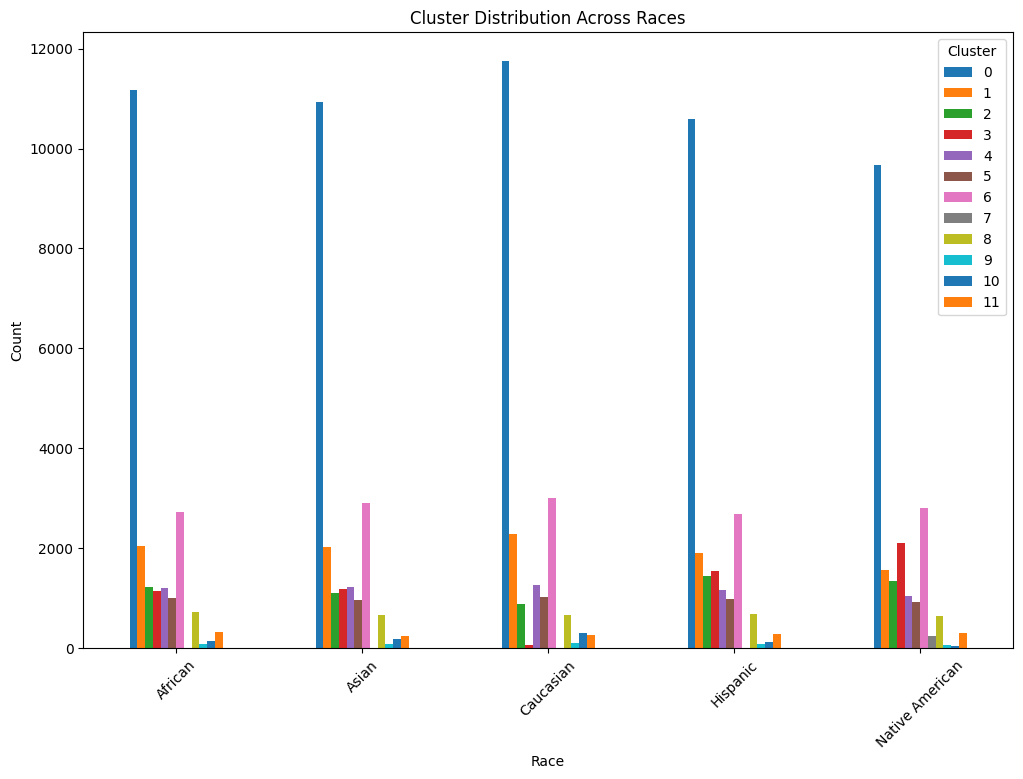

In [89]:
pivot_table_clusters_T = pivot_table_clusters.T

pivot_table_clusters_T.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Distribution Across Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.savefig('gpt_resp_cluster_dist.png')
plt.show()

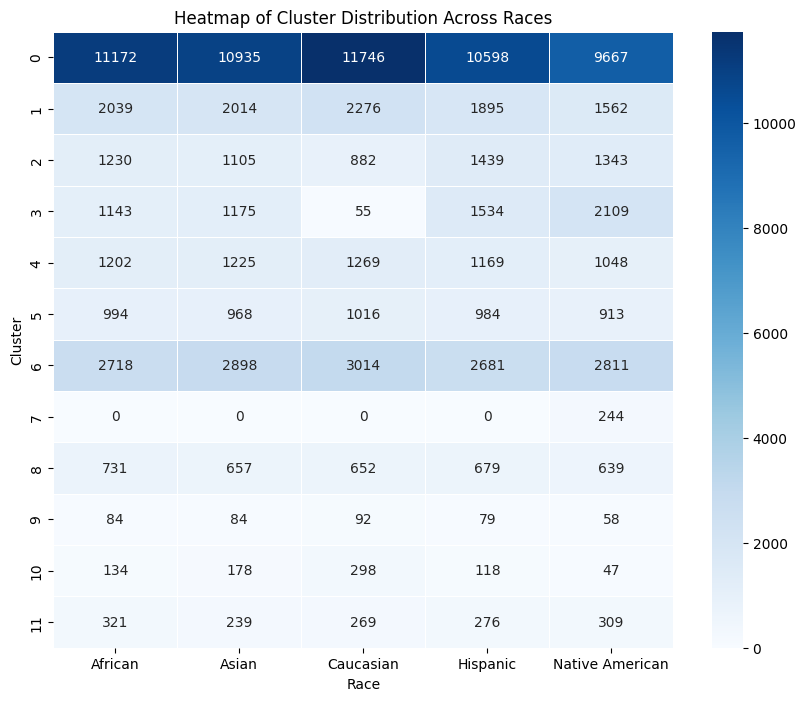

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_clusters, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Heatmap of Cluster Distribution Across Races')
plt.xlabel('Race')
plt.ylabel('Cluster')
plt.savefig('gpt_resp_cluster_heatmap.png')
plt.show()


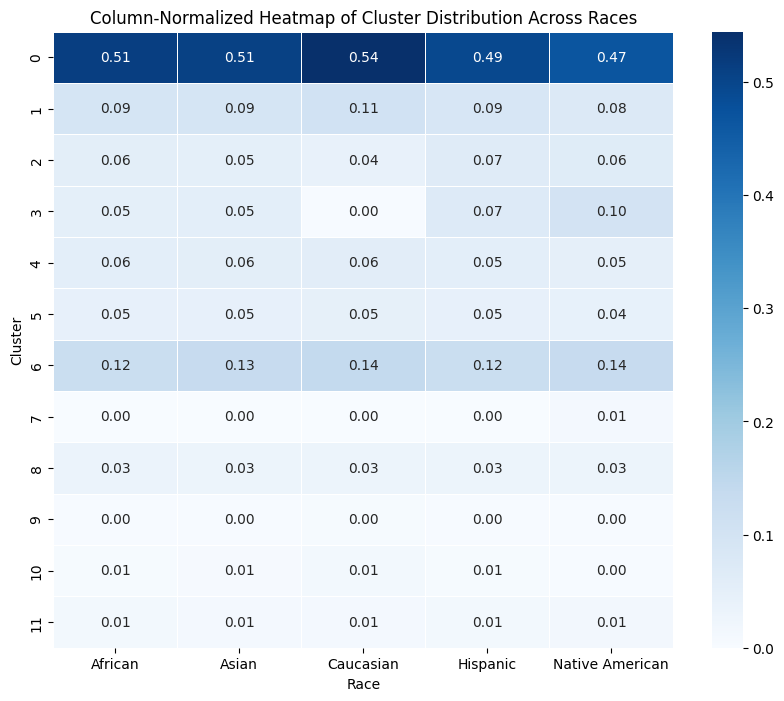

In [91]:
normalized_data_columns = pivot_table_clusters.div(pivot_table_clusters.sum(axis=0), axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(normalized_data_columns, cmap='Blues', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Column-Normalized Heatmap of Cluster Distribution Across Races')
plt.xlabel('Race')
plt.ylabel('Cluster')
plt.savefig('column_normalized_cluster_heatmap.png')
plt.show()